# Assignment 8: Data Aggregation and Group Operations

## Overview
This assignment covers data aggregation and group operations using healthcare/insurance EHR data. You'll analyze patient encounters (insurance claims), healthcare providers, and medical facilities across different regions. The data includes provider statistics, facility information, and encounter charges with insurance coverage details.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: Basic GroupBy Operations

### Part 1.1: Load and Explore Data

**TODO: Load and merge the datasets**

In [97]:
# TODO: Load the three CSV files into dataframes
# provider_df = pd.read_csv(...)
# facility_df = pd.read_csv(...)
# encounter_df = pd.read_csv(...)
provider_df = pd.read_csv("data/provider_data.csv")
facility_df = pd.read_csv("data/facility_data.csv")
encounter_df = pd.read_csv("data/encounter_data.csv")

# TODO: Print the shapes of each dataframe
# print("Provider data shape:", ...)
# print("Facility data shape:", ...)
# print("Encounter data shape:", ...)
print(provider_df.shape)
print(facility_df.shape)
print(encounter_df.shape)

# TODO: Merge the dataframes for analysis
# Hint: Start by merging encounter_df with provider_df on 'provider_id'
#       Then merge the result with facility_df on 'facility_id'
# Note: Both encounter_df and provider_df have 'facility_id', and both encounter_df and facility_df have 'region'
#       After merging, you may need to handle duplicate column names (pandas will add suffixes like _x and _y)
#       You can drop one of the duplicate columns and rename if needed
#print('provider', provider_df.columns, '\n')
#print('facility', facility_df.columns, '\n')
#print('encounter', encounter_df.columns, '\n')
encounter_provider_df = pd.merge(encounter_df,provider_df, how = 'left', on= ('provider_id'))
encounter_provider_df = encounter_provider_df.drop(columns=['facility_id_y'])
encounter_provider_df = encounter_provider_df.rename(columns={'facility_id_x': 'facility_id'})
#print(merge1.columns)
merged_df = pd.merge(encounter_provider_df, facility_df, how = 'left', on = 'facility_id')
merged_df = merged_df.drop(columns=['region_y'])
merged_df = merged_df.rename(columns={'region_x': 'region'})

# TODO: Print the merged dataframe shape, columns, and first few rows
# print("\nMerged data shape:", ...)
# print("\nColumns:", ...)
# print("\nFirst few rows:")
# print(...)
print(f'\n____Data Frame Summary____')
print(f'\nMerged data shape:\n{merged_df.shape}')
print(f'\nColumns:\n{merged_df.columns}')
print(f'first few rows:\n {merged_df.head(3)}')

(500, 7)
(10, 6)
(5000, 12)

____Data Frame Summary____

Merged data shape:
(5000, 21)

Columns:
Index(['encounter_id', 'patient_id', 'provider_id', 'facility_id',
       'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code',
       'service_charge', 'insurance_paid', 'patient_paid', 'region',
       'provider_name', 'provider_type', 'specialty', 'years_experience',
       'license_number', 'facility_name', 'facility_type', 'beds',
       'established_date'],
      dtype='object')
first few rows:
   encounter_id patient_id provider_id facility_id encounter_date  \
0     ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1     ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2     ENC00003   PAT01381      PR0213      FAC001     2023-03-20   

  encounter_type diagnosis_code  procedure_code  service_charge  \
0   Office Visit          M79.3           99213          345.03   
1      Inpatient          N18.9           85025          550.48   
2     

### Part 1.2: Basic Aggregation

**TODO: Perform basic groupby operations**

In [250]:
# TODO: Group by facility (healthcare facility) and calculate basic stats
#display(merged_df.dtypes)
# TODO: Calculate mean, sum, count for years_experience by facility
print(merged_df.groupby('facility_name')['years_experience'].agg(['mean', 'sum', 'count']))
print('\n')
# TODO: Calculate total encounter charges by facility
print(merged_df.groupby('facility_name')['encounter_id'].count().reset_index(name='count'))
print('\n')
# TODO: Calculate total insurance payments by facility
print(merged_df.groupby('facility_name')['insurance_paid'].sum().reset_index(name='total insurance payments'))
# TODO: Find the facility with highest total encounter charges
print(f"\nHighest to lowest service charges by facility:\n")
print(merged_df.groupby('facility_name')['service_charge'].sum().sort_values(ascending=False))
# TODO: Create a summary dataframe with one row per facility showing:
#       facility_name, total_providers, avg_years_experience, total_service_charge, total_insurance_paid
total_providers = merged_df.groupby('facility_name')['provider_id'].nunique()
avg_years_experience = merged_df.groupby('facility_name')['years_experience'].mean()
total_service_charge = merged_df.groupby('facility_name')['service_charge'].sum()
total_insurance_paid = merged_df.groupby('facility_name')['insurance_paid'].sum()
summary_df = pd.DataFrame({'facility_name':merged_df['facility_name'],
                           'total_providers':total_providers,
                           'avg_years_experience': avg_years_experience,
                           'total_service_charge': total_service_charge,
                           'total_insurance_paid': total_insurance_paid,
})
display(summary_df)
# TODO: Save the summary dataframe as 'output/q1_groupby_analysis.csv'
summary_df.to_csv('output/q1_groupby_analysis.csv')

    

                                  mean    sum  count
facility_name                                       
Cardiology Specialty Center  19.319728   8520    441
City General Hospital        19.563008   9625    492
Community Health Clinic      20.160784  10282    510
Emergency Medical Center     19.668687   9736    495
Northside Urgent Care        20.137014   9847    489
Oncology Treatment Center    19.381139   9865    509
Pediatric Care Center        19.811676  10520    531
Primary Care Clinic          20.102970  10152    505
Regional Medical Center      20.209205   9660    478
Surgical Specialty Center    20.778182  11428    550


                 facility_name  count
0  Cardiology Specialty Center    441
1        City General Hospital    492
2      Community Health Clinic    510
3     Emergency Medical Center    495
4        Northside Urgent Care    489
5    Oncology Treatment Center    509
6        Pediatric Care Center    531
7          Primary Care Clinic    505
8      Regional Medi

,facility_name,total_providers,avg_years_experience,total_service_charge,total_insurance_paid
0,Northside Urgent Care,NaN,NaN,NaN,NaN
1,City General Hospital,NaN,NaN,NaN,NaN
2,City General Hospital,NaN,NaN,NaN,NaN
3,Northside Urgent Care,NaN,NaN,NaN,NaN
4,Regional Medical Center,NaN,NaN,NaN,NaN
...,...,...,...,...,...
Oncology Treatment Center,NaN,324.0,19.381139,334927.30,267183.95
Pediatric Care Center,NaN,326.0,19.811676,361811.04,291790.95
Primary Care Clinic,NaN,316.0,20.102970,323315.71,260297.44
Regional Medical Center,NaN,309.0,20.209205,316284.98,251750.43


### Part 1.3: Transform Operations

**TODO: Use transform operations to add group statistics**

In [ ]:
# TODO: Add facility mean years_experience as new column
merged_df['avg_years_experience'] = merged_df.groupby('facility_name')['years_experience'].transform('mean')
# TODO: Add facility standard deviation of years_experience
merged_df['sd_years_experience'] = merged_df.groupby('facility_name')['years_experience'].transform('std')
# TODO: Create normalized years_experience (z-score within facility)
merged_df["normalized_years_experience"] = merged_df.groupby('facility_name')['years_experience'].transform(lambda x: (x - x.mean()) / x.std())
# TODO: Add facility total encounter charges as new column
merged_df['total_encounter_charges'] = merged_df.groupby('facility_name')['service_charge'].transform('sum')
# TODO: Display the enhanced dataframe
display(merged_df)
# TODO: Save results as 'output/q1_aggregation_report.txt'
with open('output/q1_aggregation_report.txt', 'w') as f:
    f.write("Assignment 8: Aggregation Report\n")
    f.write(merged_df.to_string(index = False))
print("Save output/q1_aggregation_report.txt")

,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,...,license_number,facility_name,facility_type,beds,established_date,avg_years_experience,sd_years_experience,normalized_years_experience,total_encoutner_charges,total_encounter_charges
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,...,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.863495,297283.06,297283.06
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,...,LIC000258,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-0.052607,295508.13,295508.13
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,...,LIC000213,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-1.547636,295508.13,295508.13
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,...,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-1.336020,297283.06,297283.06
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,...,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10,20.209205,11.575935,1.364105,316284.98,316284.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,...,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31,20.160784,11.044011,1.434191,334992.21,334992.21
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,...,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.485474,297283.06,297283.06
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,...,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,-0.402960,334927.30,334927.30
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,...,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,0.424825,334927.30,334927.30


Save output/q1_aggregation_report.txt


## Question 2: Advanced GroupBy Operations

### Part 2.1: Filter Operations

**TODO: Use filter operations to remove groups**

In [251]:
# TODO: Filter facilities with more than 20 providers (sufficient staffing)
total_providers = merged_df.groupby('facility_name')['provider_name'].nunique()
print(total_providers)
filtered_df = merged_df.groupby('facility_name').filter(lambda x: x['provider_name'].nunique()>20)
morethan20 = (filtered_df['facility_name'].nunique())
# TODO: Filter facilities with average years_experience > 10 (experienced staff)
filtered_df = filtered_df[filtered_df['avg_years_experience'] > 10]
morethan10 = (filtered_df['facility_name'].nunique())
# TODO: Filter facilities with total encounter charges > 250000 (high volume)
filtered_df = filtered_df[filtered_df['total_encounter_charges'] > 250000]
morethan250000 = (filtered_df['facility_name'].nunique())
# TODO: Create a summary of filtered results
summary = f"""_____Summary_____\n
facilities with more than 20 providers: {morethan20}\n
facilities with average years_experience > 10: {morethan10}\n
facilities with total encounter charges > 250000: {morethan250000}"""
# TODO: Save results as 'output/q2_filter_analysis.csv'
filtered_df.to_csv('output/q2_filter_analysis.csv')
print(summary)

facility_name
Cardiology Specialty Center    123
City General Hospital          123
Community Health Clinic        126
Emergency Medical Center       119
Northside Urgent Care          123
Oncology Treatment Center      126
Pediatric Care Center          127
Primary Care Clinic            122
Regional Medical Center        123
Surgical Specialty Center      129
Name: provider_name, dtype: int64
_____Summary_____

facilities with more than 20 providers: 10

facilities with average years_experience > 10: 10

facilities with total encounter charges > 250000: 10


### Part 2.2: Apply Operations

**TODO: Use apply operations with custom functions**

In [252]:
# TODO: Create custom function to calculate provider statistics
def provider_stats(group):
    # TODO: Return mean, std, min, max, range for years_experience
    stats = group.groupby('provider_name')['years_experience'].agg(
        mean='mean',
        std='std',
        min='min',
        max='max',
        range=lambda x: x.max() - x.min()
    )
    return stats

# TODO: Apply custom function to each facility
# Note: Add include_groups=False to avoid pandas FutureWarning about groupby columns
facility_provider_stats = merged_df.groupby('facility_name').apply(provider_stats, include_groups=False)
display(facility_provider_stats)

# TODO: Create function to find top providers in each facility
def top_providers(group, n=2):
    """Return top n providers in a group by encounter volume"""
    # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, 
    #       years_experience, specialty
    top_p = group.groupby('provider_name').agg({
    'encounter_id': 'nunique',
    'provider_id':'first',
    'specialty':'first',
    'years_experience':'first'}).sort_values('encounter_id', ascending= False)

    return(top_p.head(n))

# TODO: Apply function to get top 2 providers per facility
# IMPORTANT: When using groupby().apply(), the result has a MultiIndex where:
# - Level 0: The grouping column (facility_name)
# - Level 1: The original row index from each group
# Use reset_index(level=0) to move only the grouping column back to a regular column
# DO NOT use reset_index(drop=True) - that would drop ALL index levels including facility_name!
top_providers_by_facility = merged_df.groupby('facility_name').apply(
    lambda x: top_providers(x, n=2)
).reset_index(level=0)  # Moves facility_name from index to column
display(top_providers_by_facility)
# TODO: Save results as 'output/q2_performance_report.txt'
with open('output/q2_performance_report.txt', 'w') as f:
    f.write("Assignment 8: Performance Report\n")
    f.write(top_providers_by_facility.to_string(index=False))

mean        std  min  max  \
facility_name               provider_name                                      
Cardiology Specialty Center Alex Anderson     14.666667  13.426342    6   32   
                            Alex Brown        22.000000   8.660254   12   27   
                            Alex Garcia       21.090909  11.962061    3   39   
                            Alex Johnson      22.000000   0.000000   22   22   
                            Alex Jones        14.000000   9.539392    3   20   
...                                                 ...        ...  ...  ...   
Surgical Specialty Center   Taylor Miller     22.500000  14.152234    2   35   
                            Taylor Rodriguez  16.333333  10.073066    3   28   
                            Taylor Smith      12.250000  12.816006    4   31   
                            Taylor Williams   20.800000  15.106290    7   37   
                            Taylor Wilson     27.625000  10.927521    3   34   

                                              range  
facility_name               provider_name            
Cardiology Specialty Center Alex Anderson        26  
                            Alex Brown           15  
                            Alex Garcia          36  
                            Alex Johnson          0  
                            Alex Jones           17  
...                                             ...  
Surgical Specialty Center   Taylor Miller        33  
                            Taylor Rodriguez     25  
                            Taylor Smith         27  
                            Taylor Williams      30  
                            Taylor Wilson        31  

[1241 rows x 5 columns]

/var/folders/_w/38ks4pz11gsfp199fkrfq29w0000gn/T/ipykernel_99454/1536605253.py:37: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_providers_by_facility = merged_df.groupby('facility_name').apply(


,facility_name,encounter_id,provider_id,specialty,years_experience
provider_name,,,,,
Alex Garcia,Cardiology Specialty Center,11,PR0137,Oncology,17
Jordan Anderson,Cardiology Specialty Center,10,PR0391,Neurology,32
Jamie Jones,City General Hospital,12,PR0279,Oncology,11
Taylor Davis,City General Hospital,12,PR0345,Oncology,9
Alex Garcia,Community Health Clinic,14,PR0039,Dermatology,27
Drew Wilson,Community Health Clinic,13,PR0243,Oncology,25
Riley Miller,Emergency Medical Center,18,PR0336,Radiology,24
Alex Garcia,Emergency Medical Center,11,PR0411,Dermatology,22
Riley Miller,Northside Urgent Care,13,PR0475,Neurology,23


### Part 2.3: Hierarchical Grouping

**TODO: Perform multi-level grouping**

In [260]:
# TODO: Group by facility type and region
print(merged_df.columns)
# TODO: Calculate statistics for each facility_type-region combination
hierarchical_data = merged_df.groupby(['facility_type', 'region']).agg(
    total_providers = ('provider_id', 'nunique'),
    total_encounter_charge = ('service_charge', 'sum'),
    avg_encounter_charge = ('service_charge', 'mean'),
    avg_years_experience = ('years_experience', 'mean'))
# TODO: Use unstack to convert to wide format
# TODO: Use stack to convert back to long format
wide_format = hierarchical_data.unstack()
print('wide format\n')
display(wide_format)
long_format = wide_format.stack()
print('long_format\n')
display(long_format)
#swapped = hierarchical_data.swaplevel(0, 1)
#print(swapped)
# TODO: Analyze the hierarchical structure
# TODO: Save results as 'output/q2_hierarchical_analysis.csv'
hierarchical_data.to_csv('output/q2_hierarchical_analysis.csv')

Index(['encounter_id', 'patient_id', 'provider_id', 'facility_id',
       'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code',
       'service_charge', 'insurance_paid', 'patient_paid', 'region',
       'provider_name', 'provider_type', 'specialty', 'years_experience',
       'license_number', 'facility_name', 'facility_type', 'beds',
       'established_date', 'avg_years_experience', 'sd_years_experience',
       'normalized_years_experience', 'total_encoutner_charges',
       'total_encounter_charges'],
      dtype='object')
wide format



total_providers               total_encounter_charge  \
region                     North  South   West                  North   
facility_type                                                           
Hospital                     NaN  324.0    NaN                    NaN   
Specialty Center             NaN  424.0  427.0                    NaN   
Urgent Care                328.0  430.0  444.0              334992.21   

                                       avg_encounter_charge              \
region                South       West                North       South   
facility_type                                                             
Hospital          334927.30        NaN                  NaN  658.010413   
Specialty Center  672546.29  599974.54                  NaN  655.503207   
Urgent Care       611793.11  647192.24           656.847471  630.714546   

                             avg_years_experience                        
region                  West                North      South       West  
facility_type                                                            
Hospital                 NaN                  NaN  19.381139        NaN  
Specialty Center  634.222558                  NaN  19.742690  19.737844  
Urgent Care       622.899172            20.160784  19.881443  20.476420

long_format



/var/folders/_w/38ks4pz11gsfp199fkrfq29w0000gn/T/ipykernel_99454/3875751882.py:14: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  long_format = wide_format.stack()


total_providers  total_encounter_charge  \
facility_type    region                                            
Hospital         South             324.0               334927.30   
Specialty Center South             424.0               672546.29   
                 West              427.0               599974.54   
Urgent Care      North             328.0               334992.21   
                 South             430.0               611793.11   
                 West              444.0               647192.24   

                         avg_encounter_charge  avg_years_experience  
facility_type    region                                              
Hospital         South             658.010413             19.381139  
Specialty Center South             655.503207             19.742690  
                 West              634.222558             19.737844  
Urgent Care      North             656.847471             20.160784  
                 South             630.714546             19.881443  
                 West              622.899172             20.476420

## Question 3: Pivot Tables and Cross-Tabulations

### Part 3.1: Basic Pivot Tables

**TODO: Create pivot tables for multi-dimensional analysis**

In [263]:
# TODO: Create pivot table: encounter charges by procedure code and region
pivot = pd.pivot_table(merged_df, 
                       values = 'service_charge',
                       index = 'procedure_code', 
                       columns = 'region',
                       aggfunc = 'sum')
print(pivot)

# TODO: Create pivot table with multiple aggregations (sum, mean, count)
pivot_agg = pd.pivot_table(merged_df,
                    values='service_charge', 
                    index='procedure_code', 
                    columns='region', 
                    aggfunc= ['sum','mean','count'])
display(pivot_agg)
# TODO: Add totals (margins) to pivot table
# TODO: Handle missing values with fill_value
advanced_pivot = pd.pivot_table(merged_df,
                    values='service_charge', 
                    index='procedure_code', 
                    columns='region', 
                    aggfunc= ['sum','mean','count'],
                    margins=True,
                    margins_name='Total',
                    fill_value=0)
display(advanced_pivot)
# Tip: When saving a pivot table to CSV, the index (row labels) is preserved by default.
#      This is usually desired - when reading back, use index_col=0 to restore the index.
# TODO: Save results as 'output/q3_pivot_analysis.csv'
advanced_pivot.to_csv('output/q3_pivot_analysis.csv',index=True)
advanced_pivot.dtypes

region             North      South       West
procedure_code                                
36415           12130.35   57836.97   48458.05
70450           90236.85  375893.20  312204.53
70551           52844.83  234817.26  160891.32
72040           11463.33   81039.58   56599.39
80053           14798.09   83849.78   58540.39
85025            8946.57   48989.64   40769.13
93000            6743.28   55873.35   45845.38
99213           62143.42  327262.66  259242.79
99214           71684.08  322532.05  240095.41
99283            4001.41   31172.21   24520.39


sum                               mean               \
region             North      South       West        North        South   
procedure_code                                                             
36415           12130.35   57836.97   48458.05   466.551923   416.093309   
70450           90236.85  375893.20  312204.53  3222.744643  2665.909220   
70551           52844.83  234817.26  160891.32  2935.823889  2762.556000   
72040           11463.33   81039.58   56599.39   369.784839   471.160349   
80053           14798.09   83849.78   58540.39   284.578654   297.339645   
85025            8946.57   48989.64   40769.13   255.616286   312.035924   
93000            6743.28   55873.35   45845.38   354.909474   382.694178   
99213           62143.42  327262.66  259242.79   460.321630   498.116682   
99214           71684.08  322532.05  240095.41   465.481039   489.426480   
99283            4001.41   31172.21   24520.39   333.450833   465.256866   

                            count             
region                 West North South West  
procedure_code                                
36415            425.070614    26   139  114  
70450           2623.567479    28   141  119  
70551           2925.296727    18    85   55  
72040            425.559323    31   172  133  
80053            269.771382    52   282  217  
85025            287.106549    35   157  142  
93000            440.820962    19   146  104  
99213            473.935631   135   657  547  
99214            474.496858   154   659  506  
99283            510.841458    12    67   48

sum                                             mean  \
region              North       South        West       Total        North   
procedure_code                                                               
36415            12130.35    57836.97    48458.05   118425.37   466.551923   
70450            90236.85   375893.20   312204.53   778334.58  3222.744643   
70551            52844.83   234817.26   160891.32   448553.41  2935.823889   
72040            11463.33    81039.58    56599.39   149102.30   369.784839   
80053            14798.09    83849.78    58540.39   157188.26   284.578654   
85025             8946.57    48989.64    40769.13    98705.34   255.616286   
93000             6743.28    55873.35    45845.38   108462.01   354.909474   
99213            62143.42   327262.66   259242.79   648648.87   460.321630   
99214            71684.08   322532.05   240095.41   634311.54   465.481039   
99283             4001.41    31172.21    24520.39    59694.01   333.450833   
Total           334992.21  1619266.70  1247166.78  3201425.69   656.847471   

                                                      count                    
region                South         West        Total North South  West Total  
procedure_code                                                                 
36415            416.093309   425.070614   424.463692    26   139   114   279  
70450           2665.909220  2623.567479  2702.550625    28   141   119   288  
70551           2762.556000  2925.296727  2838.945633    18    85    55   158  
72040            471.160349   425.559323   443.756845    31   172   133   336  
80053            297.339645   269.771382   285.278149    52   282   217   551  
85025            312.035924   287.106549   295.524970    35   157   142   334  
93000            382.694178   440.820962   403.204498    19   146   104   269  
99213            498.116682   473.935631   484.427834   135   657   547  1339  
99214            489.426480   474.496858   480.903366   154   659   506  1319  
99283            465.256866   510.841458   470.031575    12    67    48   127  
Total            646.413852   628.295607   640.285138   510  2505  1985  5000

       region
sum    North     float64
       South     float64
       West      float64
       Total     float64
mean   North     float64
       South     float64
       West      float64
       Total     float64
count  North       int64
       South       int64
       West        int64
       Total       int64
dtype: object

### Part 3.2: Cross-Tabulations

**TODO: Create cross-tabulations for categorical analysis**

In [207]:
# TODO: Create crosstab of facility type vs region with counts
crosstab = pd.crosstab(merged_df['facility_type'],merged_df['region'])
print(crosstab)
# TODO: Create crosstab with margins (row and column totals)
crosstab = pd.crosstab(merged_df['facility_type'],merged_df['region'], margins=True)
print(crosstab)
# TODO: Create multi-dimensional crosstab showing facility type × encounter type × region combinations
#       (Hint: use pd.crosstab with multiple index/column parameters, or create manually from the data)
crosstab_multi = pd.crosstab(index = [merged_df['facility_type'],merged_df['encounter_type']],columns= merged_df['region'], margins=True)
# TODO: Analyze the cross-tabulation results
display(crosstab_multi)

# TODO: Save results as 'output/q3_crosstab_analysis.csv'
crosstab_multi.to_csv('output/q3_crosstab_analysis.csv')

region            North  South  West
facility_type                       
Hospital              0    509     0
Specialty Center      0   1026   946
Urgent Care         510    970  1039
region            North  South  West   All
facility_type                             
Hospital              0    509     0   509
Specialty Center      0   1026   946  1972
Urgent Care         510    970  1039  2519
All                 510   2505  1985  5000


region                                 North  South  West   All
facility_type    encounter_type                                
Hospital         Emergency                 0    127     0   127
                 Inpatient                 0     95     0    95
                 Lab                       0    100     0   100
                 Office Visit              0     85     0    85
                 Outpatient Procedure      0    102     0   102
Specialty Center Emergency                 0    236   182   418
                 Inpatient                 0    210   191   401
                 Lab                       0    211   180   391
                 Office Visit              0    175   200   375
                 Outpatient Procedure      0    194   193   387
Urgent Care      Emergency               109    190   195   494
                 Inpatient                90    190   201   481
                 Lab                      90    229   228   547
                 Office Visit            112    178   200   490
                 Outpatient Procedure    109    183   215   507
All                                      510   2505  1985  5000

### Part 3.3: Pivot Table Visualization

**TODO: Create visualizations from pivot tables**

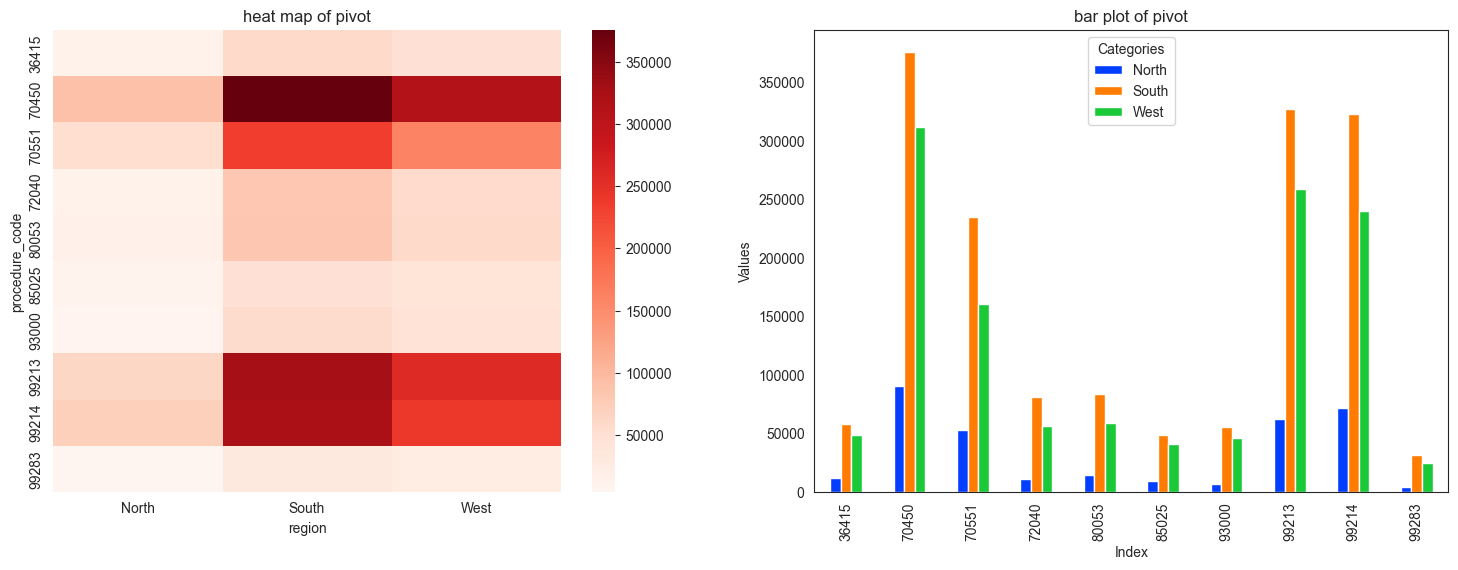

In [245]:
# TODO: Create heatmap from pivot table
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# TODO: Customize colors and styling
sns.set_style('white')
sns.heatmap(data = pivot,ax=axes[0], cmap = 'Reds')
# TODO: Create bar chart from pivot table
pivot.plot(kind='bar', ax=axes[1], color=sns.color_palette('bright', len(pivot.columns)))# TODO: Add appropriate titles and labels
axes[0].set_title('heat map of pivot')
axes[1].set_title('bar plot of pivot')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Values')
axes[1].legend(title='Categories')
# TODO: Save the plot as 'output/q3_pivot_visualization.png'
fig.savefig('output/q3_pivot_visualization.png', dpi=300)

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_groupby_analysis.csv` - Basic groupby analysis
- [ ] `output/q1_aggregation_report.txt` - Aggregation report
- [ ] `output/q2_filter_analysis.csv` - Filter operations analysis
- [ ] `output/q2_hierarchical_analysis.csv` - Hierarchical analysis
- [ ] `output/q2_performance_report.txt` - Performance report
- [ ] `output/q3_pivot_analysis.csv` - Pivot table analysis
- [ ] `output/q3_crosstab_analysis.csv` - Cross-tabulation analysis
- [ ] `output/q3_pivot_visualization.png` - Pivot visualization

## Key Learning Objectives

- Master the split-apply-combine paradigm
- Apply aggregation functions and transformations
- Create pivot tables for multi-dimensional analysis
- Apply advanced groupby techniques